# Detecting STR frameshift mutations in cancer patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_rows", 400)
pd.get_option("display.max_rows")

400

In [3]:
df_str_info = pd.read_csv(
    "/Users/maxverbiest/PhD/data/str_panels/tral_and_perf_panel_meta_info.tsv",
    sep="\t"
)
df_patient_variation = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/results/oxana_variation/patient_variation_wide.tsv",
    sep="\t"
)

In [4]:
df_str_info.head()

,chr,start,end,period,repeat_id,msa,max_p_stretch,tmp_id,ref,in_segdup,region_type,neighbour_type
0,chr1,64174,64181,2,1099233.0,"AT,AT,AT,AT",4,chr1_64174,4,True,intron/intergenic,no_neighbour
1,chr1,64658,64666,1,1099234.0,"A,A,A,A,A,A,A,A,A",9,chr1_64658,9,True,intron/intergenic,no_neighbour
2,chr1,66161,66174,2,NaN,"TA,TA,TA,TA,TA,TA,TA",7,chr1_66161,7,True,intron/intergenic,neighbour_match
3,chr1,66176,66183,2,NaN,"TA,TA,TA,TA",4,chr1_66176,4,True,intron/intergenic,neighbour_match
4,chr1,66193,66200,2,NaN,"TA,TA,TA,TA",4,chr1_66193,4,True,intron/intergenic,neighbour_match


In [5]:
df_str_info[df_str_info["tmp_id"] == "chr1_2187286"]

,chr,start,end,period,repeat_id,msa,max_p_stretch,tmp_id,ref,in_segdup,region_type,neighbour_type
1599,chr1,2187286,2187296,1,NaN,"T,T,T,T,T,T,T,T,T,T,T",11,chr1_2187286,11,False,intron/intergenic,neighbour_match


In [6]:
df_patient_variation[df_patient_variation["patient_len_diff"] > 0].head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
30,TCGA-AA-3489,chr1_2187286,11,11,10,10,1,11,.,2
106,TCGA-AA-3489,chr1_10117623,10,10,11,11,1,12,1106416,2
118,TCGA-AA-3489,chr1_11080554,10,10,5,5,1,11,1107512,10
119,TCGA-AA-3489,chr1_11080564,18,18,17,19,2,21,1107496,2
131,TCGA-AA-3489,chr1_11806287,10,10,9,9,3,10,1108021,2


In [7]:
df_patient_variation_filt = (
    df_patient_variation
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("not in_segdup and neighbour_type == 'no_neighbour' and period > 0")
        .loc[:, df_patient_variation.columns] 
)

df_patient_variation_filt.head()

,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff
1,TCGA-AA-3489,chr1_971311,3,3,3,3,4,3,1099283,0
2,TCGA-AA-3489,chr1_1043875,5,5,5,5,2,5,1099359,0
3,TCGA-AA-3489,chr1_1051937,4,4,4,4,2,4,1099381,0
4,TCGA-AA-3489,chr1_1090878,4,4,4,4,2,4,1099469,0
5,TCGA-AA-3489,chr1_1182416,4,4,4,4,2,4,1099502,0


In [8]:
print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

107


,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff
count,2.944233e+06,2.944233e+06,2.944233e+06,2.944233e+06,2.944233e+06,2.944233e+06,2.944233e+06
mean,6.606853e+00,6.647248e+00,6.646516e+00,6.676083e+00,2.189993e+00,6.731326e+00,2.196990e-01
std,4.366166e+00,4.467193e+00,4.427453e+00,4.513057e+00,1.112059e+00,4.613307e+00,1.032292e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
50%,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00
max,5.000000e+01,5.800000e+01,5.100000e+01,3.850000e+02,6.000000e+00,5.000000e+01,3.600000e+02


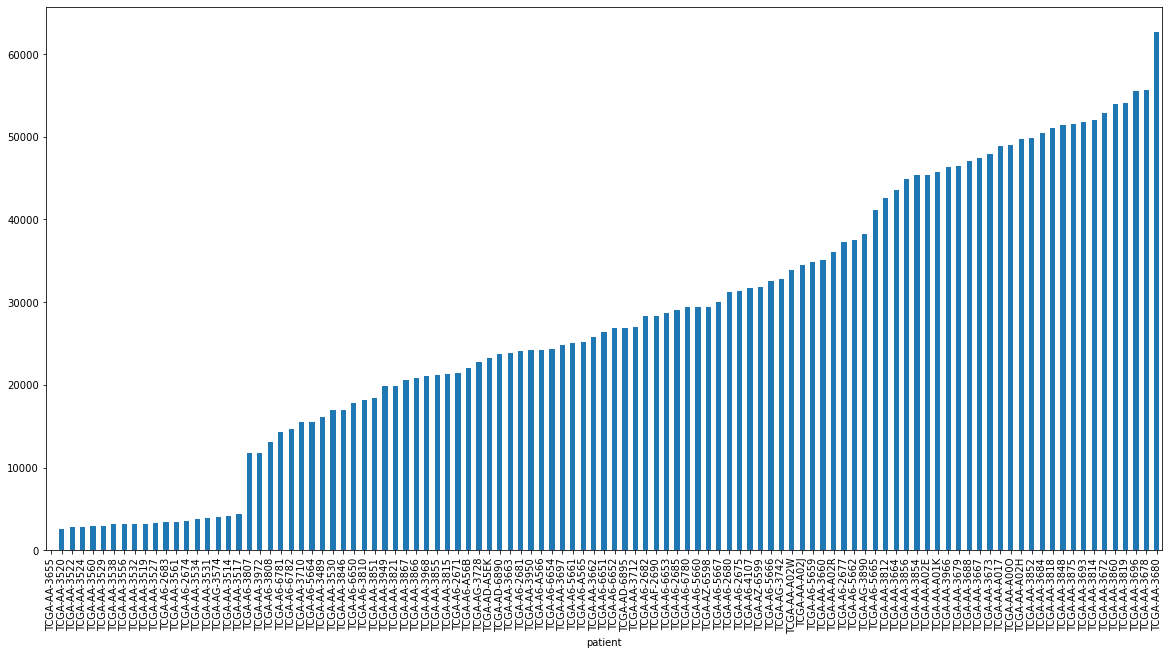

In [9]:
fig = plt.figure(figsize=(20, 10))

(
df_patient_variation_filt
    .groupby("patient")
    .size()
    .sort_values()
    .plot(kind="bar")
)

plt.show()

In [10]:
df_patient_variation_filt = (
    df_patient_variation_filt
        .groupby('patient')
        .filter(lambda x: len(x) > 5000)
        .reset_index()
)

print(df_patient_variation_filt['patient'].nunique())
df_patient_variation_filt.describe()

88


,index,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff
count,2.883659e+06,2.883659e+06,2.883659e+06,2.883659e+06,2.883659e+06,2.883659e+06,2.883659e+06,2.883659e+06
mean,1.875652e+06,6.630032e+00,6.670959e+00,6.670517e+00,6.700385e+00,2.184522e+00,6.755852e+00,2.224805e-01
std,1.087737e+06,4.382612e+00,4.484424e+00,4.444641e+00,4.530866e+00,1.111096e+00,4.631125e+00,1.040151e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
25%,9.318135e+05,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00
50%,1.881802e+06,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00
75%,2.816778e+06,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00
max,3.767564e+06,5.000000e+01,5.800000e+01,5.100000e+01,3.850000e+02,6.000000e+00,5.000000e+01,3.600000e+02


In [11]:
df_potential_fs = (
    df_patient_variation_filt
        .merge(df_str_info, how="left", on="tmp_id", suffixes=(None, "_tmp"))
        .query("region_type == 'CDS' and patient_len_diff > 0")
        .loc[:, df_patient_variation_filt.columns]
)

df_potential_fs.shape

(5084, 11)

In [12]:
def is_frameshift(allele_pair: tuple, period: int) -> bool:
    if (abs(allele_pair[0] - allele_pair[1]) * period) % 3 == 0:
        return False
    return True

def count_frameshifts(row) -> int:
    a_to_a = abs(row["allele_A_healthy"] - row["allele_A_tumor"]) + abs(row["allele_B_healthy"] -  row["allele_B_tumor"])
    a_to_b = abs(row["allele_A_healthy"] - row["allele_B_tumor"]) + abs(row["allele_B_healthy"] -  row["allele_A_tumor"])

    if a_to_a <= a_to_b:
        pair1 = (row["allele_A_healthy"], row["allele_A_tumor"])
        pair2 = (row["allele_B_healthy"], row["allele_B_tumor"])
    else:
        pair1 = (row["allele_A_healthy"], row["allele_B_tumor"])
        pair2 = (row["allele_B_healthy"], row["allele_A_tumor"])
    
    return is_frameshift(pair1, row["period"]) + is_frameshift(pair2, row["period"])


In [13]:
df_potential_fs["n_frameshifts"] = df_potential_fs.apply(lambda row: count_frameshifts(row), axis=1)
df_potential_fs.head(n=10)

,index,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,n_frameshifts
101,131,TCGA-AA-3489,chr1_11806287,10,10,9,9,3,10,1108021,2,0
126,177,TCGA-AA-3489,chr1_15874235,13,13,12,12,1,13,1111129,2,2
1564,2000,TCGA-AA-3489,chr1_207889756,12,12,11,11,1,12,1211697,2,2
2575,3268,TCGA-AA-3489,chr2_113742700,10,10,9,9,1,10,295582,2,2
2693,3418,TCGA-AA-3489,chr2_151251574,10,10,9,9,1,10,312542,2,2
3618,4507,TCGA-AA-3489,chr3_25607296,13,13,12,12,3,13,683057,2,0
3721,4619,TCGA-AA-3489,chr3_40462030,12,15,12,14,3,10,690639,1,0
4148,5128,TCGA-AA-3489,chr3_113658635,11,11,10,10,1,11,729804,2,2
4167,5148,TCGA-AA-3489,chr3_120411953,4,4,6,6,2,4,734302,4,2
4266,5256,TCGA-AA-3489,chr3_129436701,13,13,14,14,1,14,741282,2,2


In [14]:
df_potential_fs.describe()

,index,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,patient_len_diff,n_frameshifts
count,5.084000e+03,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000,5084.000000
mean,1.793699e+06,8.210071,8.323171,8.559992,8.657946,2.179190,8.979740,3.362116,0.945319
std,1.031323e+06,4.537765,4.780733,4.591233,4.777854,1.226611,4.594151,2.130336,0.970021
min,1.310000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,9.387225e+05,5.000000,5.000000,4.000000,4.000000,1.000000,5.000000,2.000000,0.000000
50%,1.677984e+06,8.000000,8.000000,9.000000,9.000000,2.000000,9.000000,2.000000,1.000000
75%,2.547146e+06,10.000000,11.000000,11.000000,11.000000,3.000000,11.000000,5.000000,2.000000
max,3.767261e+06,30.000000,47.000000,39.000000,44.000000,6.000000,42.000000,22.000000,2.000000


In [15]:
df_potential_fs.sort_values(by="patient_len_diff", ascending=False).head(n=50)

,index,patient,tmp_id,allele_A_tumor,allele_B_tumor,allele_A_healthy,allele_B_healthy,period,ref,repeat_id,patient_len_diff,n_frameshifts
2101817,2735500,TCGA-AA-3856,chr4_20618997,4,4,15,15,2,4,93221,22,2
1171152,1526690,TCGA-AA-3672,chr3_50061561,11,12,22,22,1,24,698905,21,2
411121,527611,TCGA-A6-5665,chr3_50061561,11,12,22,22,1,24,698905,21,2
2325610,3021858,TCGA-AA-3966,chr17_42126632,16,17,26,28,1,27,503077,21,2
232703,293279,TCGA-AZ-6599,chr6_16327635,27,47,35,35,3,30,8007,20,0
1122929,1463146,TCGA-AA-3667,chr16_67195891,14,15,23,23,3,19,813174,17,0
2790412,3644277,TCGA-AD-A5EK,chr6_16327635,22,24,22,41,3,30,8007,17,0
1711482,2233797,TCGA-AA-3814,chr4_53453021,6,6,14,14,2,5,.,16,2
924608,1184459,TCGA-A6-6781,chr1_15928649,13,13,5,5,2,5,1111043,16,2
1858303,2423801,TCGA-AA-3821,chr4_53453021,13,13,5,5,2,5,.,16,2


In [16]:
df_potential_fs[df_potential_fs["n_frameshifts"] > 0].shape

(2546, 12)

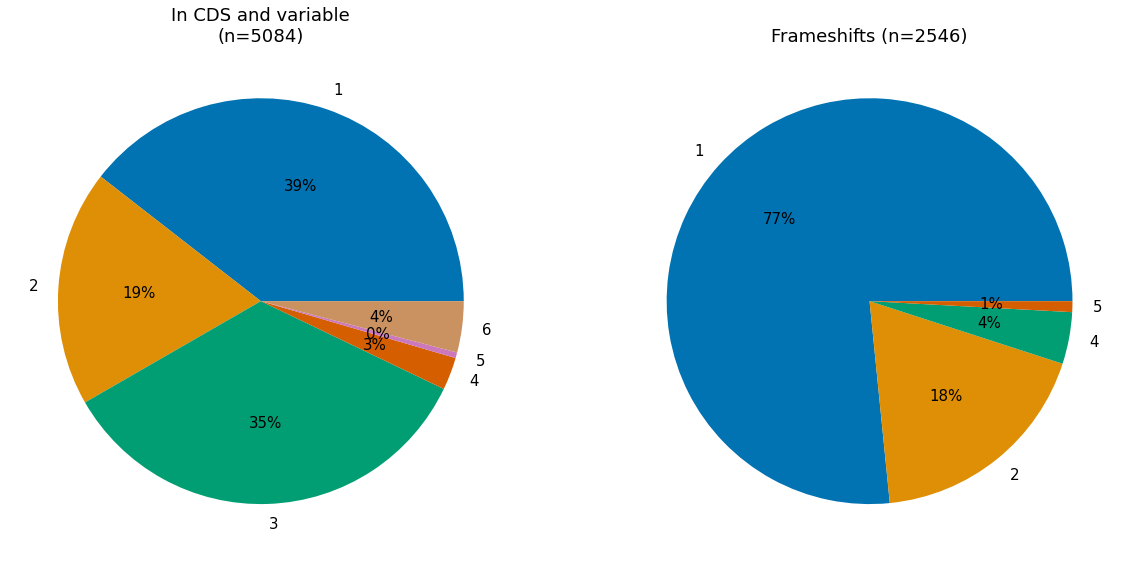

In [20]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(
    df_potential_fs.groupby("period").size(), 
    explode=[0, 0, 0, 0, 0, 0],
    labels=df_potential_fs.groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax1.set(title=f"In CDS and variable\n(n={df_potential_fs.shape[0]})")

ax2.pie(
    df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size(), 
    labels=df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts (n={df_potential_fs[df_potential_fs['n_frameshifts'] > 0].shape[0]})")

plt.show()

In [21]:
df_clinical = pd.read_csv(
    "/Users/maxverbiest/PhD/projects/genotype_strs/data/clinical/oxana_tcga_clinical.csv", 
).loc[:, ["case_submitter_id", "gender", "MSI", "CMS"]]
df_clinical.columns = ["patient", "gender", "MSI", "CMS"]

In [22]:
df_clinical.groupby("MSI").size()

MSI
MSI     77
MSS    335
dtype: int64

In [23]:
df_fs = df_potential_fs[df_potential_fs["n_frameshifts"] > 0]

df_fs_summary = pd.DataFrame(
    {
        "frameshift_loci": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).size(),
        "frameshift_events": df_potential_fs[df_potential_fs["n_frameshifts"] > 0].groupby(["patient"]).sum()["n_frameshifts"],
        "total_calls": df_patient_variation_filt.groupby("patient").size()
    }
)
df_fs_summary["perc_fs"] = (df_fs_summary["frameshift_loci"] / df_fs_summary["total_calls"]) * 100
df_fs_summary = df_fs_summary.merge(df_clinical, how="left", on="patient")


In [24]:
df_fs_summary

,patient,frameshift_loci,frameshift_events,total_calls,perc_fs,gender,MSI,CMS
0,TCGA-A6-2671,20,39,21391,0.093497,male,MSS,CMS4
1,TCGA-A6-2675,30,44,31366,0.095645,male,MSS,CMS4
2,TCGA-A6-2677,8,16,37254,0.021474,female,MSS,CMS2
3,TCGA-A6-2680,33,53,31192,0.105796,female,MSS,CMS2
4,TCGA-A6-2681,22,43,24044,0.091499,female,MSS,CMS4
5,TCGA-A6-2682,26,33,28323,0.091798,male,MSS,CMS4
6,TCGA-A6-2685,31,44,29023,0.106812,female,MSS,CMS4
7,TCGA-A6-3807,12,24,11701,0.102555,female,MSS,CMS4
8,TCGA-A6-3808,11,22,13099,0.083976,male,MSS,CMS4
9,TCGA-A6-3810,5,10,18177,0.027507,male,MSS,CMS4


In [40]:
df_fs_summary.groupby("MSI").describe().transpose()
df_fs_summary.groupby("MSI").size().reset_index()

,MSI,0
0,MSI,16
1,MSS,72


In [26]:
from scipy.stats import ttest_ind
df_fs_summary = df_fs_summary.dropna()
ttest_ind(a=df_fs_summary[df_fs_summary["MSI"] == "MSI"]["frameshift_loci"], b=df_fs_summary[df_fs_summary["MSI"] == "MSS"]["frameshift_loci"])


Ttest_indResult(statistic=11.60538370390805, pvalue=2.746414029971989e-19)

In [27]:
df_fs = (
    df_fs
        .merge(df_clinical, how="left", on="patient")
)

In [44]:
# df_fs.groupby('MSI').size()
df_summ = (df_fs
    .groupby(['MSI', 'period'])
    .size().reset_index()
    .merge(df_fs_summary.groupby("MSI").size().reset_index(), how="left", on="MSI")
)
df_summ.columns = ('MSI', 'period', 'fs_events', 'sample_size')
df_summ["fs_events_per_patient"] = df_summ.apply(lambda row: row['fs_events'] / row['sample_size'], axis=1)
df_summ

,MSI,period,fs_events,sample_size,fs_events_per_patient
0,MSI,1,1083,16,67.687500
1,MSI,2,137,16,8.562500
2,MSI,4,16,16,1.000000
3,MSI,5,4,16,0.250000
4,MSS,1,867,72,12.041667
5,MSS,2,332,72,4.611111
6,MSS,4,89,72,1.236111
7,MSS,5,18,72,0.250000


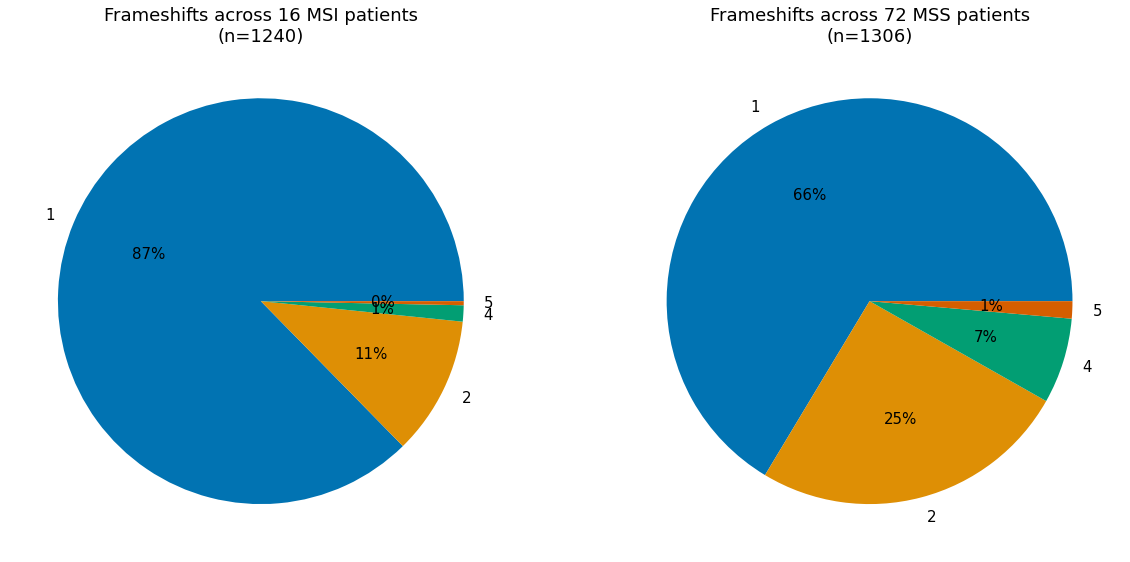

In [48]:
plt.rc('font', size=15)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 20))

ax1.pie(
    df_fs[df_fs["MSI"] == "MSI"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSI"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax1.set(title=f"Frameshifts across 16 MSI patients\n(n={df_fs[df_fs['MSI'] == 'MSI'].groupby('period').size().sum()})")

ax2.pie(
    df_fs[df_fs["MSI"] == "MSS"].groupby("period").size(), 
    labels=df_fs[df_fs["MSI"] == "MSS"].groupby("period").size().index, 
    colors=sns.color_palette('colorblind')[0:6], 
    autopct='%.0f%%'
)
ax2.set(title=f"Frameshifts across 72 MSS patients\n(n={df_fs[df_fs['MSI'] == 'MSS'].groupby('period').size().sum()})")

# ax2.pie(
#     df_fs.groupby("period").size(), 
#     labels=df_fs.groupby("period").size().index, 
#     colors=sns.color_palette('colorblind')[0:6], 
#     autopct='%.0f%%'
# )
# ax2.set(title=f"Frameshifts across 88 patients\n(n={df_fs.shape[0]})")

plt.show()

In [61]:
msi_fs_loci = set(df_fs[df_fs["MSI"]  == "MSI"].tmp_id.unique())
mss_fs_loci = set(df_fs[df_fs["MSI"]  == "MSS"].tmp_id.unique())

len(msi_fs_loci.difference(mss_fs_loci))

197